In [1]:
import numpy as np
import pandas as pd

퍼셉트론 학습 알고리즘

In [11]:
class Test(object):
  def __init__(self):  # 생성자 객체생성시 자동 호출
    print("객체가 생성되었습니다.")

  def tfunc(self,x):
    print("사용자 정의함수 ", x)

In [12]:
t = Test()

객체가 생성되었습니다.


In [16]:
t.tfunc(123)

사용자 정의함수  123


In [18]:
x = np.array([
    [1,2,3,4,5],
    [10,20,30,40,50]
])
y = np.array([0,1])

In [20]:
for a,b in zip(x,y):
  print(a, b)

[1 2 3 4 5] 0
[10 20 30 40 50] 1


In [24]:
rgen = np.random.RandomState(1)
w = rgen.normal(loc=0.0,scale=0.01, size=1+5)

퍼셉트론 API - 이진 분류기

In [70]:
class Perceptron(object):
  def __init__(self, eta=0.01,n_iter=50, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state    
  
  # 학습함수
  def fit(self, X, y):
    # 가중치 초기화를 위한 시드값 고정
    rgen = np.random.RandomState(self.random_state)
    # 가중치 초기화 생성
    self.w_ =  rgen.normal(loc = 0.0, scale=0.01, size = 1+X.shape[1])  # 1은 바이어스(절편)
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi,target in zip(X,y):
        update = self.eta*(target - self.predict(xi))
        self.w_[1:] += update*xi  # 실제 입력데이터와 매치되는 가중치를 갱신
        self.w_[0] += update
        errors += int(update != 0.0) 
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
    return np.where( self.net_input(X) >=0.0, 1,-1)



데이터 로드

In [31]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df =  pd.read_csv(s,header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


시각화

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='2', ylabel='3'>

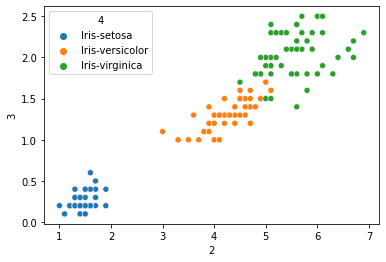

In [37]:
sns.scatterplot(data=df, x=2, y=3, hue=4)

In [42]:
np.unique(df[4],return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

Iris-setosa : 양성클래스

Iris-versicolor : 음성클래스

In [56]:
y = df.iloc[:100,4].values

In [57]:
y[:50] = -1

In [58]:
y[50:] = 1

In [59]:
X = df.iloc[:100,[0,2]].values

In [60]:
X.shape, y.shape

((100, 2), (100,))

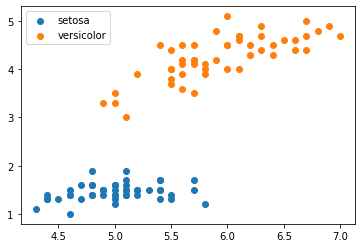

In [64]:
import matplotlib.pyplot as plt
plt.scatter(X[:50,0],X[:50,1], label = 'setosa')
plt.scatter(X[50:,0],X[50:,1], label = 'versicolor')
plt.legend()
plt.show()

퍼셉트론 모델 훈련

In [71]:
p = Perceptron(eta=0.1, n_iter=10)

In [72]:
p.fit(X,y)

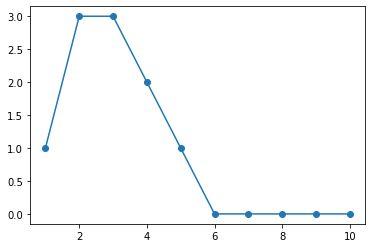

In [75]:
plt.plot(range(1,len(p.errors_)+1) , p.errors_, marker = 'o')
plt.show()